**Download and extract data**

In [14]:
%cd /content/
!rm -r /content/DDoS-Attack-Detection-ML
!git clone https://github.com/khangklj/DDoS-Attack-Detection-ML.git
%cd /content/DDoS-Attack-Detection-ML

/content
rm: cannot remove '/content/DDoS-Attack-Detection-ML': No such file or directory
Cloning into 'DDoS-Attack-Detection-ML'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10 (delta 1), reused 6 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 6.01 KiB | 6.01 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/DDoS-Attack-Detection-ML


In [15]:
# Install requirements
!pip install -r requirements.txt

In [16]:
# Download dataset (Skip if you has already downloaded)
# Cite: Talukder, Md Alamin; Uddin, Md Ashraf (2023), “CIC-DDoS2019 Dataset”, Mendeley Data, V1, doi: 10.17632/ssnc74xm6r.1

# You can download via gdown
!mkdir /content/DDoS-Attack-Detection-ML/dataset
%cd /content/DDoS-Attack-Detection-ML/dataset
id = "1jg3L6W3jUjwTDoxQ6xTdh-K0eQl5kYps" # Input your googledrive file id here
!gdown $id

%cd /content/DDoS-Attack-Detection-ML

/content/DDoS-Attack-Detection-ML/dataset
Downloading...
From (original): https://drive.google.com/uc?id=1jg3L6W3jUjwTDoxQ6xTdh-K0eQl5kYps
From (redirected): https://drive.google.com/uc?id=1jg3L6W3jUjwTDoxQ6xTdh-K0eQl5kYps&confirm=t&uuid=5fff2657-3e4d-4e4e-ac29-c61afa5cf3a3
To: /content/DDoS-Attack-Detection-ML/dataset/cicddos2019_dataset.csv
100% 155M/155M [00:01<00:00, 78.6MB/s]
/content/DDoS-Attack-Detection-ML


**Data preprocessing**

In [17]:
import os
import argparse
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Model

In [18]:
# Read data
df = pd.read_csv('/content/DDoS-Attack-Detection-ML/dataset/cicddos2019_dataset.csv')
print(df.columns)
df

Index(['Unnamed: 0', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,306196,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431367,306197,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431368,306198,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431369,306199,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [19]:
drop_columns = [ # drop unnecessary columns
    "Unnamed: 0",
]
df.columns = df.columns.str.strip()
df.drop(columns=drop_columns, inplace=True)

In [20]:
df.dtypes

,0
Protocol,int64
Flow Duration,int64
Total Fwd Packets,int64
Total Backward Packets,int64
Fwd Packets Length Total,float64
...,...
Idle Std,float64
Idle Max,float64
Idle Min,float64
Label,object


In [21]:
# Remove inf and NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print("NaN: ", df.isna().sum())
df.dropna(inplace=True)
df.shape

NaN:  Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Class                       0
Length: 79, dtype: int64


(431371, 79)

In [22]:
# Remove duplicated
print("Duplicated: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

Duplicated:  5449


(425922, 79)

Encode data

In [23]:
# Encode Class column to 0 or 1
print("Encode Class column")
binary_le = LabelEncoder()
df['Class'] = binary_le.fit_transform(df['Class'])
binary_le_mapping = dict(zip(binary_le.classes_, binary_le.transform(binary_le.classes_)))
for key, value in binary_le_mapping.items():
  print(f"{key}: {value}")

# Encode Label column to 0,1,2,... for each unique value of df
print("Encode Label column")
multi_le = LabelEncoder()
df['Label'] = multi_le.fit_transform(df['Label'])
multi_le_mapping = dict(zip(multi_le.classes_, multi_le.transform(multi_le.classes_)))
for key, value in multi_le_mapping.items():
  print(f"{key}: {value}")

df

Encode Class column
Attack: 0
Benign: 1
Encode Label column
Benign: 0
DrDoS_DNS: 1
DrDoS_LDAP: 2
DrDoS_MSSQL: 3
DrDoS_NTP: 4
DrDoS_NetBIOS: 5
DrDoS_SNMP: 6
DrDoS_UDP: 7
LDAP: 8
MSSQL: 9
NetBIOS: 10
Portmap: 11
Syn: 12
TFTP: 13
UDP: 14
UDP-lag: 15
UDPLag: 16
WebDDoS: 17


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425917,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
425918,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
425919,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
425920,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


**Train and predict**

In [24]:
# Santity check
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425917,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
425918,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
425919,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
425920,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


Binary classes prediction

In [25]:
# Selecting features except for 'Label' and 'Class'
X = df.drop(labels=['Label','Class'], axis=1)

# Selecting the 'Class' column
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred) # Accuracy
precision = precision_score(y_test, y_pred) # Precision
recall = recall_score(y_test, y_pred) # Recall
f1 = f1_score(y_test, y_pred) # F1-score

# Printing the evaluation metrics
print("Accuracy", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy 0.9993073897986735
Precision: 0.9980405655880951
Recall: 0.9988340046639813
F1-score: 0.9984371274933115


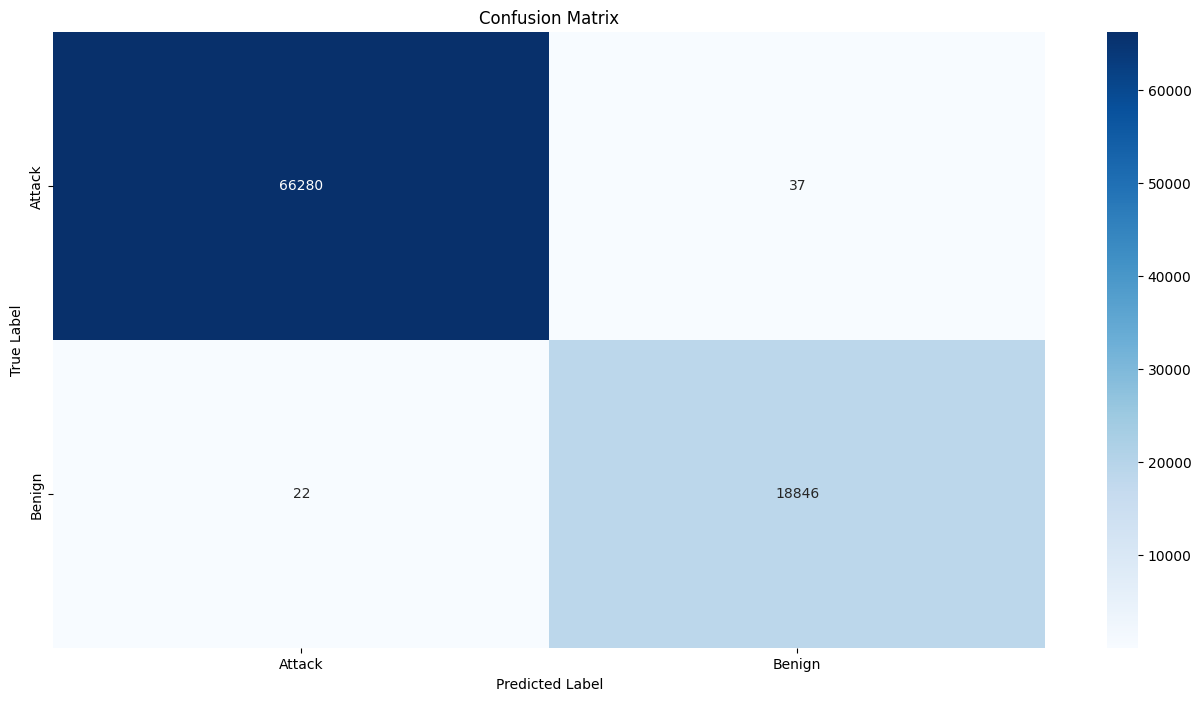

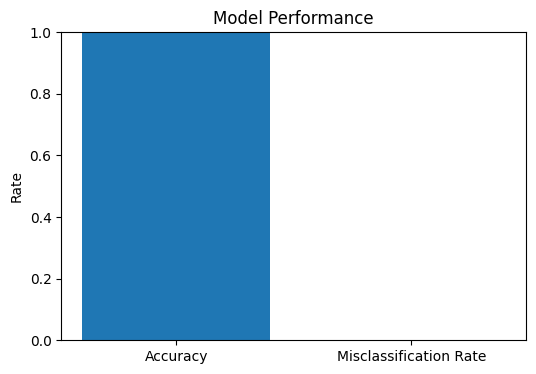

In [26]:
# Comparative visualization
labels = list(binary_le_mapping.keys())

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy and misclassification rate
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# Create a bar plot for accuracy and misclassification rate
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy', 'Misclassification Rate'], [accuracy, misclassification_rate])
plt.ylim(0, 1)
plt.title('Model Performance')
plt.ylabel('Rate')
plt.show()

Multi-classes prediction

In [27]:
# Selecting features except for 'Label' and 'Class'
X = df.drop(labels=['Label','Class'], axis=1)

# Selecting the 'Label' column
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred) # Accuracy
precision = precision_score(y_test, y_pred, average="weighted") # Precision
recall = recall_score(y_test, y_pred, average="weighted") # Recall
f1 = f1_score(y_test, y_pred, average="weighted") # F1-score

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9281563655573164
Precision: 0.9279004960378228
Recall: 0.9281563655573164
F1-score: 0.9278875486784088


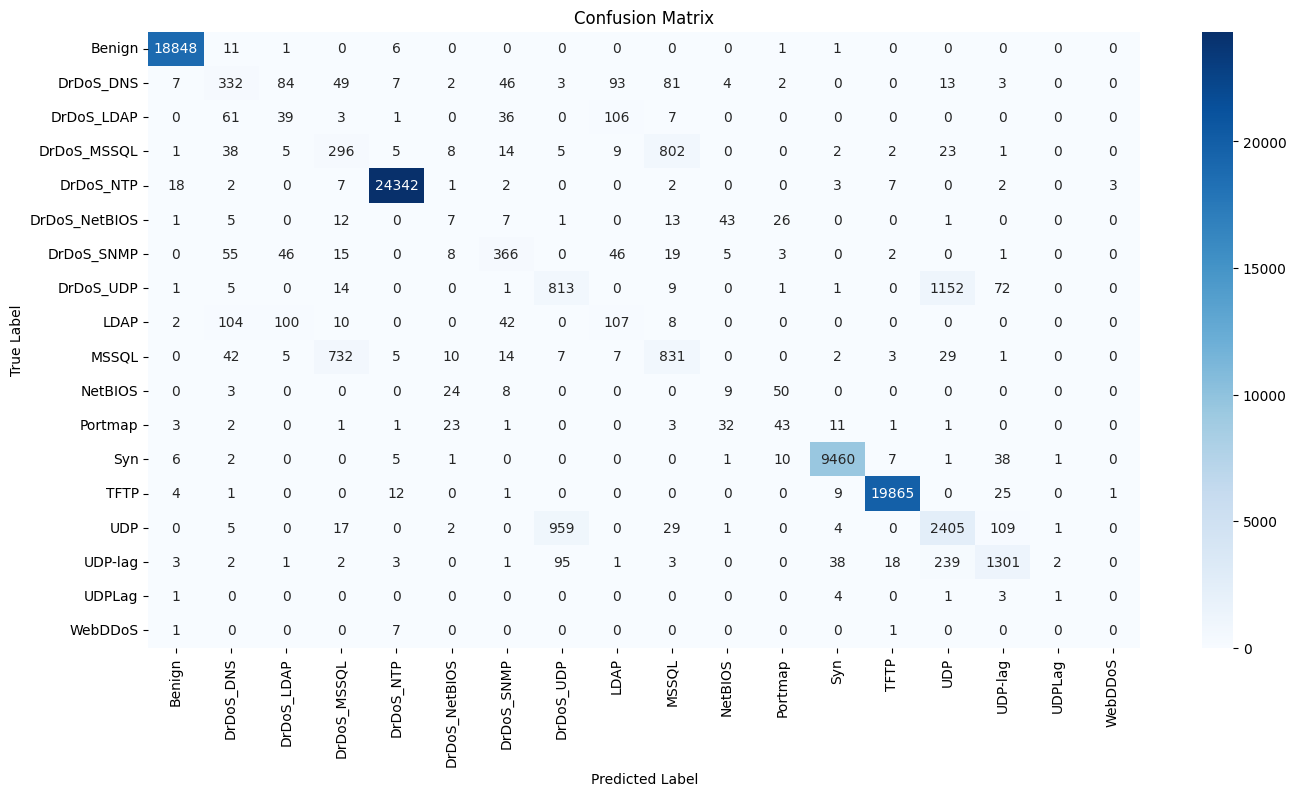

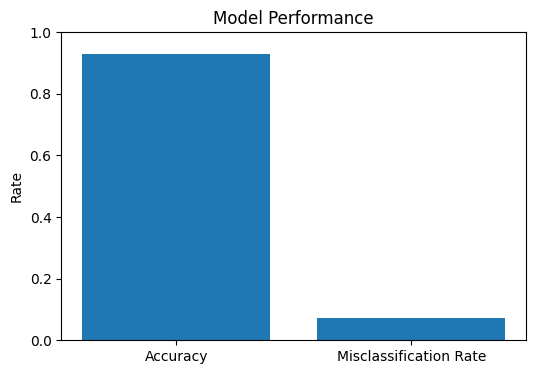

In [28]:
# Comparative visualization
labels = list(multi_le_mapping.keys())

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy and misclassification rate
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# Create a bar plot for accuracy and misclassification rate
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy', 'Misclassification Rate'], [accuracy, misclassification_rate])
plt.ylim(0, 1)
plt.title('Model Performance')
plt.ylabel('Rate')
plt.show()